In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras import datasets, layers, models
%matplotlib inline

(256, 256, 3)


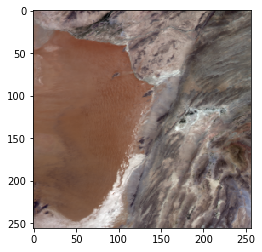

In [2]:
data = np.load('all_image_data.npy', allow_pickle=True)
# data[class name][image number][0][0]
np_img = data[3][100][0][0]
print(np_img.shape)
#print(np_img)
plt.imshow(np_img)
plt.show()

In [3]:
np.random.shuffle(data)

In [4]:
IMG_HEIGHT,IMG_WIDTH = (256, 256)

In [5]:
def create_dataset(filename):
   
    img_data_array = []
    class_name = []
   
    for class_label in range(6):
        for ii, file in enumerate(data[class_label]):
       
            image = data[class_label][ii][0][0]
            image = image.astype('float32')
            image /= 256
            img_data_array.append(image)
            class_name.append(class_label)
            
    img_data_array = np.array(img_data_array)
    class_name = np.array(class_name)
            
    return img_data_array, class_name

In [6]:
# extract the image array and class name
img_data, class_name = create_dataset(data)

In [7]:
target_val = class_name

In [8]:
# model=tf.keras.Sequential(
#         [
#             tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
#             tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
#             tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
#             tf.keras.layers.Flatten(),
#             tf.keras.layers.Dense(6)
#         ])
# model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# history = model.fit(x=np.array(img_data, np.float32), y=np.array(list(map(int,target_val)), np.float32), epochs=5)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data, target_val, test_size=0.33, random_state=42)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4170, 256, 256, 3), (2055, 256, 256, 3), (4170,), (2055,))

In [12]:
class_names = ['Cloud', 'Dust', 'Haze', 'Land', 'Seaside', 'Smoke']

In [13]:
train_labels = np.array([0,1,2,3,4,5])

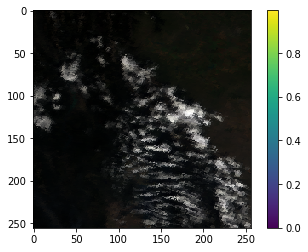

In [14]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

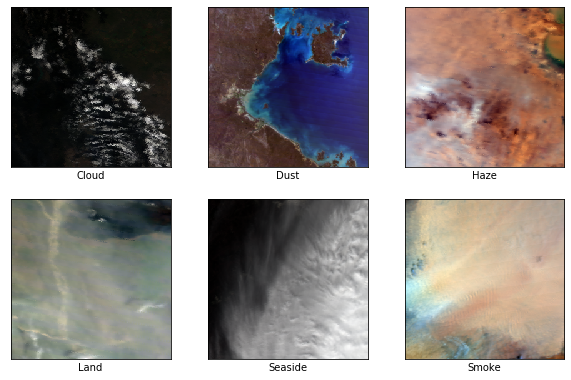

In [15]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [173]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(256, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Dropout(0.1))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(6))

In [174]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [175]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_119 (Conv2D)          (None, 255, 255, 32)      416       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_105 (Dropout)        (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_120 (Conv2D)          (None, 84, 84, 64)        8256      
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_106 (Dropout)        (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 27, 27, 128)     

In [176]:
model.fit(X_train, y_train, epochs=20, callbacks=[callback])

Train on 4170 samples
Epoch 1/20
4170/4170 [==============================] - 4s 846us/sample - loss: 1.4593 - accuracy: 0.3890
Epoch 2/20
4170/4170 [==============================] - 3s 762us/sample - loss: 1.0514 - accuracy: 0.5916
Epoch 3/20
4170/4170 [==============================] - 3s 763us/sample - loss: 0.9110 - accuracy: 0.6520
Epoch 4/20
4170/4170 [==============================] - 3s 758us/sample - loss: 0.8417 - accuracy: 0.6806
Epoch 5/20
4170/4170 [==============================] - 3s 769us/sample - loss: 0.7683 - accuracy: 0.7094
Epoch 6/20
4170/4170 [==============================] - 3s 746us/sample - loss: 0.7204 - accuracy: 0.7261
Epoch 7/20
4170/4170 [==============================] - 3s 757us/sample - loss: 0.6486 - accuracy: 0.7597
Epoch 8/20
4170/4170 [==============================] - 3s 751us/sample - loss: 0.6287 - accuracy: 0.7693
Epoch 9/20
4170/4170 [==============================] - 3s 760us/sample - loss: 0.5815 - accuracy: 0.7844
Epoch 10/20
4170/4170 [=

In [177]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

2055/1 - 1s - loss: 0.5426 - accuracy: 0.8209

Test accuracy: 0.8209246
